In [1]:
import pandas as pd
import numpy as np
import requests
import json
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup


In [2]:
# da B3
# https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm

url = 'https://sistemaswebb3-listados.b3.com.br/indexProxy/indexCall/GetPortfolioDay/eyJpbmRleCI6IklCT1YiLCJsYW5ndWFnZSI6InB0LWJyIn0='

r = requests.get(url)
pd.json_normalize(json.loads(r.content))
comp_ibov =  pd.json_normalize(json.loads(r.content), record_path =['results'])
comp_ibov.drop(columns=['segment', 'partAcum'], inplace=True) # Not really necessary
comp_ibov.sort_values(by=['part'], ascending=False, inplace=True)
comp_ibov['part'] = comp_ibov['part'].apply(lambda x: float(x.replace(',', '.'))/100) # Also not necessary in this case
comp_ibov['theoricalQty'] = comp_ibov['theoricalQty'].apply(lambda x: int(x.replace('.', ''))) # Same as above
comp_ibov

,cod,asset,type,part,theoricalQty
65,PETR4,PETROBRAS,PN N2,0.06566,4566441248
51,ITUB4,ITAUUNIBANCO,PN EJ N1,0.06495,4799907051
12,BBDC4,BRADESCO,PN N1,0.04936,5156077326
64,PETR3,PETROBRAS,ON N2,0.04285,2684384823
7,B3SA3,B3,ON EDJ NM,0.03716,5901731302
...,...,...,...,...,...
27,CVCB3,CVC BRASIL,ON NM,0.00084,275967676
43,GOLL4,GOL,PN N2,0.00082,190059275
30,ECOR3,ECORODOVIAS,ON NM,0.00080,333657615
68,POSI3,POSITIVO TEC,ON NM,0.00044,73573028


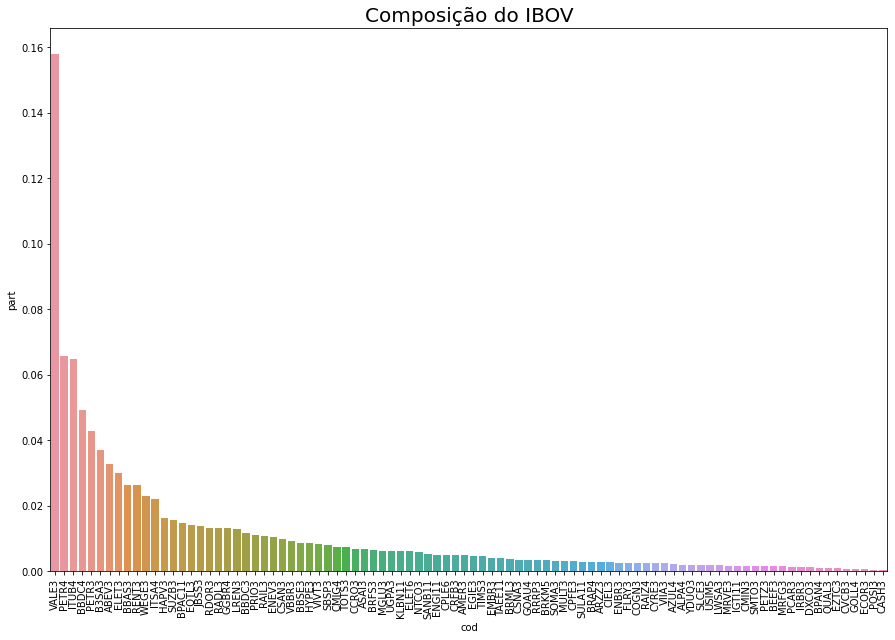

In [30]:
plt.figure(figsize=(15, 10))
sns.barplot(x='cod', y='part', data=comp_ibov.sort_values(by='part', ascending=False))
plt.title('Composição do IBOV', fontsize=20)
plt.xticks(rotation=90)
None

In [19]:
url = 'https://sistemaswebb3-listados.b3.com.br/indexProxy/indexCall/GetPortfolioDay/eyJpbmRleCI6IklCT1YiLCJsYW5ndWFnZSI6InB0LWJyIn0='

r = requests.get(url)
date = pd.json_normalize(json.loads(r.content))['header.date'][0]
date

'03/10/22'

In [22]:
#do infomoney

comp_ibov_im_url = 'https://www.infomoney.com.br/cotacoes/b3/indice/ibovespa/'

comp_ibov_im = pd.read_html(comp_ibov_im_url, decimal=',', thousands='.')[2:]
comp_ibov_im = pd.concat(comp_ibov_im).reset_index(drop=True)
comp_ibov_im


,Ativo,Último (R$),Var. Dia (%),Val. Min (R$),Val. Máx (R$),Data
0,ABEV3,15.54,4.70,15.53,16.32,16:47 03/10
1,ALPA4,21.27,5.88,21.89,22.88,16:47 03/10
2,AMER3,16.98,7.13,17.29,18.43,16:47 03/10
3,ARZZ3,98.41,4.11,99.54,102.78,16:47 03/10
4,ASAI3,17.55,4.62,17.62,18.48,16:47 03/10
...,...,...,...,...,...,...
87,VIIA3,3.19,10.34,3.30,3.59,16:47 03/10
88,VIVT3,40.49,3.73,40.65,42.00,16:47 03/10
89,WEGE3,32.14,4.01,31.34,33.63,16:47 03/10
90,COGN3,2.94,-0.34,2.70,2.97,16:47 03/10


In [23]:
pd.read_html(comp_ibov_im_url, decimal=',', thousands='.')[0]

,0,1
0,Fechamento anterior,110037
1,Abertura,110048
2,Negócios,5950422
3,Volume,"$ 48,03 B"


In [24]:
pd.read_html(comp_ibov_im_url, decimal=',', thousands='.')[1]

,0,1
0,Mín — Máx (Dia),110.048 - 116.093
1,Variação (Dia),+5.47%
2,Variação (Mês),+5.47%
3,Variação (2022),+10.72%
4,Variação (52 semanas),+2.8%
